**<p style='text-align: right;'>Ver. 1.0.1</p>**

# Introductory Applied Machine Learning (IAML) Coursework 2 - Semester 2, 2021-22

### Author: Hiroshi Shimodaira and Shuzhuang Xu

## Important Instructions

#### It is important that you follow the instructions below carefully for things to work properly.

You need to set up and activate your environment as you would do for your labs, see Learn section on Labs.  **You will need to use Noteable to create one of the files you will submit (the PDF)**.  Do **NOT** create the PDF in some other way, we will not be able to mark it.  If you want to develop your answers in your own environment, you should make sure you are using the same packages we are using, by running the cell which does imports below.

Read the instructions in this notebook carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the required code/markdown cell.

- We will use the IAML Learn page for any announcements, updates, and FAQs on this assignment. Please ***visit the page frequently*** to find the latest information/changes.
- Data files that you will be using are included in the [git repository](https://github.com/uoe-iaml/DL-S2-2022-CW2) for this coursework.
- There is a helper file 'iaml22cw2_helpers.py' in the git repository, which you should upload to your environment.
- Some of the topics in this coursework are covered in weeks 7 and 8 of the course. Focus first on questions on topics that you have covered already, and come back to the other questions as the lectures progress.
- Keep your answers brief and concise.
- Make sure to show all your code/working.
- All the figures you present should have axis labels, titles, and grid lines unless specified explicitly. If you think grid lines spoiling readability, you can adjust the line width and/or line style. Figures should not be too small to read.
- Write readable code. While we do not expect you to follow PEP8 to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. Do use inline comments when doing something non-standard.
- When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. 
- When you use libraries specified in this coursework, you should use the default parameters unless specified explicitly.
- The criteria on which you will be judged include the quality of the textual answers and/or any plots asked for. For higher marks, when asked you need to give good and concise discussions based on experiments and theories using your own words.

- You will see <html>\\pagebreak</html> at the start of each subquestion.  ***Do not remove these, if you do we will not be able to mark your coursework.***

#### Good Scholarly Practice
Please remember the University requirement regarding all assessed work for credit. Details about this can be found at:
http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct

Specifically, this assignment should be your own individual work. We will employ tools for detecting misconduct.

Moreover, please note that Piazza is NOT a forum for discussing the solutions of the assignment. You may ask private questions. You can use the office hours to ask questions.

### SUBMISSION Mechanics
This assignment will account for 30% of your final mark. We ask you to submit answers to all questions.

You will submit (1) a PDF of your Notebook via Gradescope, and (2) the Notebook itself via Learn.  Your grade will be based on the PDF, we will only use the Notebook if we need to see details.  **You must use the following procedure to create the materials to submit**.

1. Make sure your Notebook and the datasets are in Noteable and will run.  If you developed your answers in Noteable, this is already done.

2. Select **Kernel->Restart & Run All** to create a clean copy of your submission, this will run the cells in order from top to bottom.  This may take a while (a few hours) to complete, ensure that all the output and plots have complete before you proceed.

3. Select **File->Download as->PDF via LaTeX (.pdf)** and wait for the PDF to be created and downloaded.

4. Select **File->Download as->Notebook (.ipynb)**

5. You now should have in your download folder the pdf and the notebook.  Rename them sNNNNNNN.pdf and sNNNNNNN.ipynb, where sNNNNNNN is your matriculation number (student number).

**Details on submission instructions will be announced and documented on Learn well before the deadline**. 

The submission deadline for this assignment is **5th April 2022 at 16:00 UK time (UTC)**.  Don't leave it to the last minute!


#### IMPORTS
Execute the cell below to import all packages you will be using for this assignment.  If you are not using Noteable, make sure the python and package version numbers reported match the python and package numbers specified in the comment at the end of this cell.

In [1]:
import os
import platform
import sys
from pathlib import Path
import pickle
import sklearn
import scipy
import numpy as np
np.random.seed(1)
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture

import warnings 
warnings.filterwarnings('ignore')

from iaml22cw2_helpers import *
print_versions();

# You can add other libraries here if necessary
import math
from matplotlib import cm
from matplotlib.patches import Ellipse
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

Python	3.8.3 <=> 3.9.2
Scipy	1.5.0 <=> 1.7.0
Numpy	1.18.5 <=> 1.21.1
Sklearn	0.23.1 <=> 0.24.2
Matplotlib	3.2.2 <=> 3.4.2


\pagebreak

# Question 1  Analysis and classification of a music genre data set

#### 55 marks out of 110 for this coursework

In this question, we use a modified version of the [GTZAN Dataset - Music Genre Classification](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification). The data set is a collections of music of 10 genres and each genre has 100 music samples of parameterised features.
<!-- that have been parameterised from the original audio signals.
the GTZAN data set (http://marsyas.info). The original data set is provided as audio signals, but
 -->


Load the data set in the following manner:
```python
        Xtrn, Ytrn, Xtst, Ytst = pickle.loads(Path('dset_q1.pkl').read_bytes())
```
**Xtrn** and **Xtst** contain feature vectors for training and testing, respectively, where rows correspond to music instances and columns to features (attributes) of 513 dimensions.
**Ytrn** and **Ytst** contain the corresponding genre labels, where genre  name (i.e. class) is coded in an integer between 0 and 9.


# ========== Question 1.1 --- [9 marks] ==========

We want to see how each feature distributes for different classes. Instead of displaying the distributions of all the 513 dimensions, we are going to pick up several ones only in this question.

1. [Code] Using **Xtrn**, for each of the classes, 0,1,2, plot a histogram of each of dimensions, 0,2,4,6,8 and place the resultant 15 histograms in a grid of 3-by-5, where you show the histograms left-to-right then top-to-bottom, so that rows correspond to classes and columns to dimensions.

  Note that:
  - Add a title to each histogram to clarify the class and dimension.
  - Share the same axis ranges among the histograms of the same dimension, which helps to compare histograms between different classes.
  
  
2. [Text] Are there any differences in term of dimension and class? Explain your findings briefly.

\pagebreak
## Your answers for Question 1.1

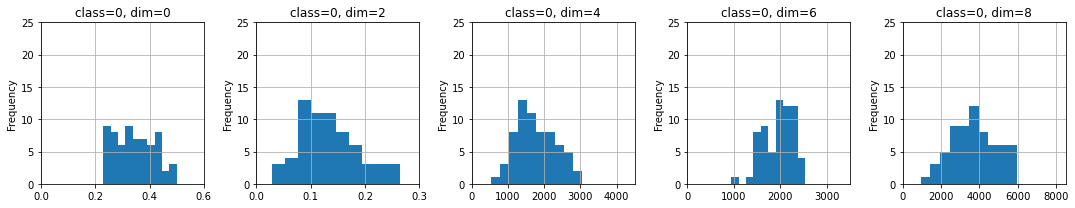

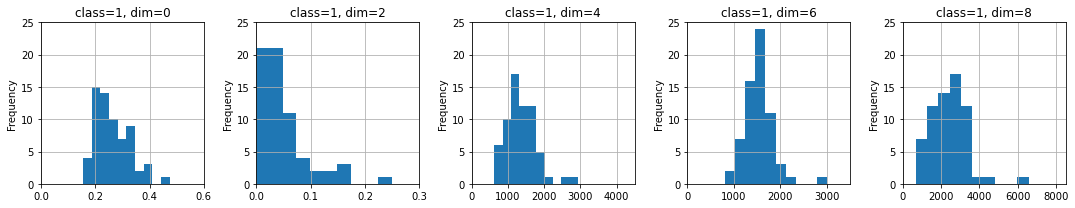

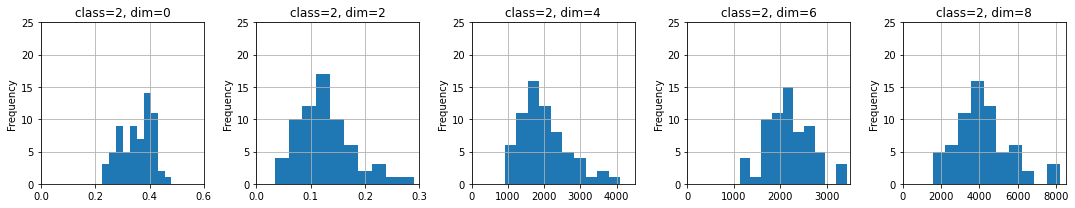

In [2]:
#(1)

# load dataset
Xtrn, Ytrn, Xtst, Ytst = pickle.loads(Path('dset_q1.pkl').read_bytes())

# prepare data
gtzan_train = pd.DataFrame(Xtrn)
gtzan_train['class'] = Ytrn

cols = [0,2,4,6,8,'class']

gtzan_train_subset = gtzan_train[cols]
gtzan_train_subset = gtzan_train_subset[gtzan_train_subset['class'] < 3]

# visualise histograms
x_ranges = [0.6, 0.3, 4500, 3500, 8500]

def draw_histograms(df, variables, n_rows, n_cols, label):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax,figsize=(15,3))
        ax.set_title('class={}, dim={}'.format(label, var_name))
        ax.set_xlim([0.0, x_ranges[i]])
        ax.set_ylim([0.0, 25.0])
        ax.set_ylabel("Frequency")
    fig.tight_layout()
    plt.show()

for label in range(0,3):
    draw_histograms(gtzan_train_subset[gtzan_train_subset['class'] == label], 
                    gtzan_train_subset[cols[0:-1]], 1, 5, label)

(2) ***Your answer goes here***  

There are some differences in distributions across both classes and dimensions. For instance, across dimension 0, we observe that class 0 has multimodal distribution, whereas class 1 has unimodal distribution (with a right skew). Across class 2, we observe that both dimensions 2, 4, and 8 have a right skew, whereas dimension 0 has a left skew and dimension 6 is bell-shaped.

There are some similarities observed across both dimensions and classes. For instance, dimensions 2 and 4 across all visualised classes have a right skew. Across class 1, all visualised dimensions have a right skew.

\pagebreak

# ========== Question 1.2 --- [8 marks] =========

In this question, we consider dimensionality reduction of the music data set with Principal Component Analysis (PCA) to visualise the data.
At first, apply PCA to **Xtrn** using Sklearn's **PCA** with default parameters, where you pass **Xtrn** to the function without applying preprocessing.

1. [Code] Plot the following two graphs side-by-side. 
     - A graph of the variance explained by a principal component as a function of principal component number, where you depict the graph for up to the first 200 principal components only. Use a linear or log scale for the y-axis.
     - A graph of the cumulative explained variance ratio as a function of principal component number, where you depict the graph for up to the first 200 principal components only. Use a linear scale for the y-axis.


2. [Code] Mapping all the instances in **Xtrn** on to the 2D space spanned with the first two principal components, plot a scatter graph of the instances on the space, where different colours or symbols should be used to denote different genres. The x-axis should correspond to the first principal component, and the y-axis to the second component. Use a legend.


3. [Text] Discuss your findings based on the graphs (results) you obtained.

\pagebreak
## Your answers for Question 1.2

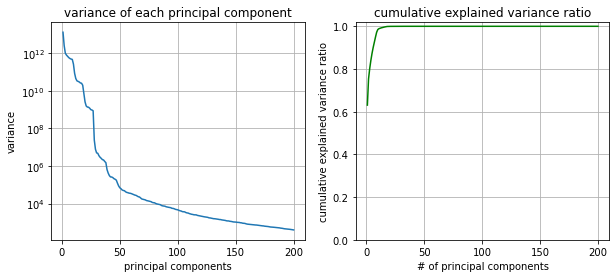

In [3]:
#(1)

# apply PCA
pca = PCA()
Xtrn_pca = pca.fit_transform(Xtrn)

# compute variance and cumulative explained variance ratio
variance_explained = pca.explained_variance_[0:200]
cumulative_explained_variance_ratio = list(pca.explained_variance_ratio_[0:1])

for i in range(1, len(pca.explained_variance_ratio_[0:200])):
    cumulative_explained_variance_ratio.append(
        cumulative_explained_variance_ratio[i-1] + pca.explained_variance_ratio_[i]
    )

# visualise scatterplots
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax = ax.flatten()

ax[0].plot(range(1,201), variance_explained)
ax[0].set(xlabel='principal components', ylabel='variance', yscale='log', 
          title='variance of each principal component')
ax[0].grid()

ax[1].plot(range(1,201), cumulative_explained_variance_ratio, color='green')
ax[1].set(xlabel='# of principal components', ylabel='cumulative explained variance ratio', ylim=0.0, 
          title='cumulative explained variance ratio')
ax[1].grid()

plt.show()

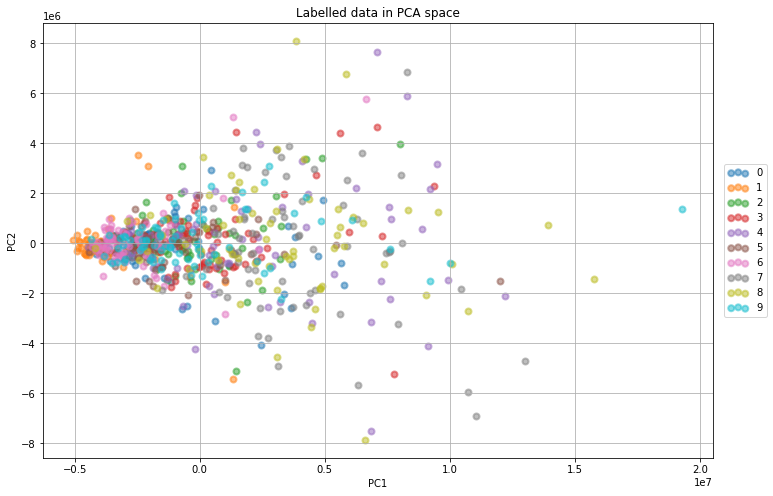

In [4]:
#(2) 

# apply PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(Xtrn)

# visualise scatterplot
plt.figure(figsize=(12,8))

for label in set(Ytrn):
    plt.scatter(X_2d[Ytrn == label, 0], X_2d[Ytrn == label, 1], alpha=.5, lw=2, label=label)

plt.axis('equal')
plt.legend(loc='center left', scatterpoints=3, bbox_to_anchor=[1.01, 0.5])
plt.title('Labelled data in PCA space')
plt.xlabel('PC1')
plt.ylabel('PC2')
top_plot = plt.gca()
plt.grid()

plt.show()

(3) ***Your answer goes here***  

From the scree plots above, we observe that the first 5 principal components explain around 90% variance. This is an acceptably large percentage.  

We observe high skewness of data in the scatter plot. Without running a clustering algorithm, it is difficult to conclude whether the data is seperable (as several points are plotted on top of one another). We could visualise a kernel density plot, which may enable us to see better where the density lies.  

Additionally, we could try visualising the distribution of each label in the 3D PCA space.  

\pagebreak

# ========== Question 1.3 --- [5 marks] =========

We now standardise the data by mean and standard deviation using the method described below, and look into how the standardisation has impacts on PCA.

Create the standardised training data **Xtrn_s** and test data **Xtst_s** in your code in the following manner.
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrn)
Xtrn_s = scaler.transform(Xtrn) # standardised training data
Xtst_s = scaler.transform(Xtst) # standardised test data
```

1. [Code] Using **Xtrn_s** instead of **Xtrn**, answer the subquestion 1.2.1.

2. [Code] Using **Xtrn_s** instead of **Xtrn**, answer the subquestion 1.2.2.

3. [Text] Comparing with the results you obtained in 1.2, explain and discuss your findings briefly.

\pagebreak
## Your answers for Question 1.3

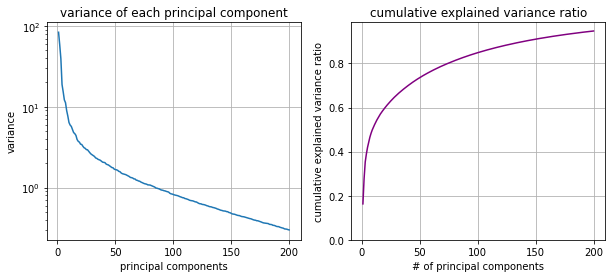

In [5]:
#(1) 

# standardise data
scaler = StandardScaler().fit(Xtrn)
Xtrn_s = scaler.transform(Xtrn) # standardised training data
Xtst_s = scaler.transform(Xtst) # standardised test data

# apply PCA
pca = PCA()
Xtrn_s_pca = pca.fit_transform(Xtrn_s)

# compute variance and cumulative explained variance ratio
variance_explained = pca.explained_variance_[0:200]
cumulative_explained_variance_ratio = list(pca.explained_variance_ratio_[0:1])

for i in range(1, len(pca.explained_variance_ratio_[0:200])):
    cumulative_explained_variance_ratio.append(
        cumulative_explained_variance_ratio[i-1] + pca.explained_variance_ratio_[i]
    )

# visualise scatterplots
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax = ax.flatten()

ax[0].plot(range(1,201), variance_explained)
ax[0].set(xlabel='principal components', ylabel='variance', yscale='log', 
          title='variance of each principal component')
ax[0].grid()

ax[1].plot(range(1,201), cumulative_explained_variance_ratio, color='purple')
ax[1].set(xlabel='# of principal components', ylabel='cumulative explained variance ratio', ylim=0.0, 
          title='cumulative explained variance ratio')
ax[1].grid()

plt.show()

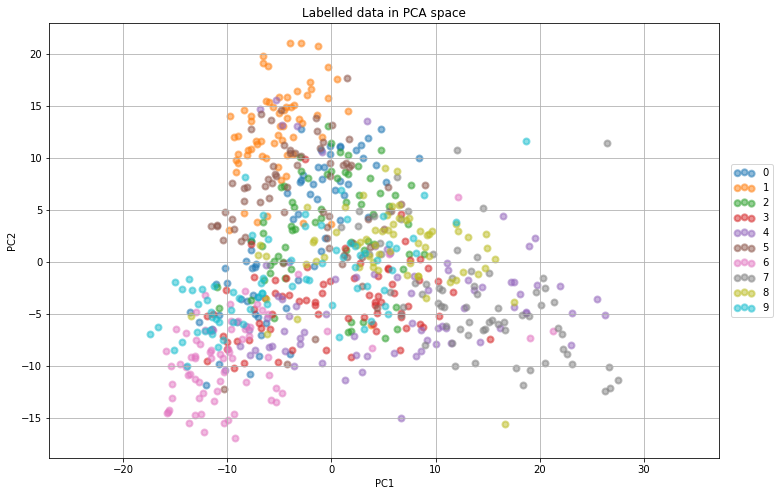

In [6]:
#(2)

# apply PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(Xtrn_s)

# visualise scatterplot
plt.figure(figsize=(12,8))

for label in set(Ytrn):
    plt.scatter(X_2d[Ytrn == label, 0], X_2d[Ytrn == label, 1], alpha=.5, lw=2, label=label)

plt.axis('equal')
plt.legend(loc='center left', scatterpoints=3, bbox_to_anchor=[1.01, 0.5])
plt.title('Labelled data in PCA space')
plt.xlabel('PC1')
plt.ylabel('PC2')
top_plot = plt.gca()
plt.grid()

plt.show()

(3) ***Your answer goes here***  

Compared to the figures produced in Question 1.2., we observe some differences: 

- From the new scree plots with standardised data, we observe that it takes significantly more principal components to explain variance. For instance, it takes 40 principal components to explain around 70% variance.

- In the second figure, we observe slightly better separation of the data. However, several points are still plotted on top of one another. So, we recommend visualising kernel density plot and visualising distribution of each label in the 3D PCA space for further analysis. 

\pagebreak

# ========== Question 1.4 --- [6 marks] ==========

We now want to investigate the effect of the data standardisation on the classification with multi-class logistic regression.

1. [Code] Do the following for each of the original data set and the standardised data set.
  1. Train a logistic regression classifier using the training set.
  2. Run a classification experiment on each of the training and test sets and report the classification accuracy and a confusion matrix for each set. 
  
  Note that:
  - Use Sklearn's **LogisticRegression** with parameters 'max_iter=1000' and 'random_state=0' while use default values for the other parameters. 
  - Your confusion matrix should show the numbers of samples in figures instead of ratios.
  

2. [Text] Comparing the results obtained, explain and describe your findings briefly


\pagebreak
## Your answers for Question 1.4



======== ORIGINAL DATA ========

Classification accuracy on training set: 0.447
Classification accuracy on test set: 0.290


======== STANDARDISED DATA ========

Classification accuracy on training set: 1.000
Classification accuracy on test set: 0.690


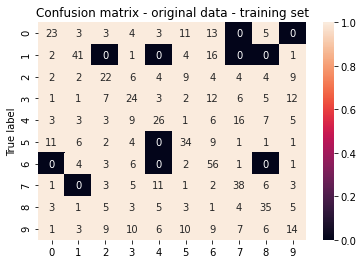

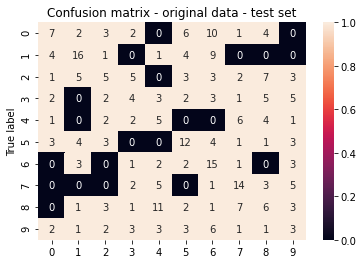

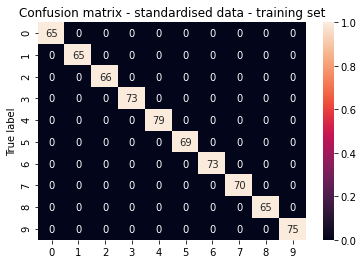

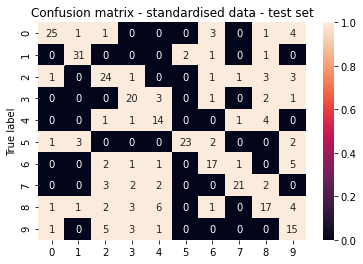

In [7]:
#(1)

# define function for plotting confusion matrix
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')


# define function to compute acccuracies and visualise confusion matrices
def lr_accuracy_and_cm(Xtrn, Ytrn, Xtst, Ytst, version):
    # print classification accuracies
    lr = LogisticRegression(max_iter=1000, random_state=0)
    lr.fit(Xtrn, Ytrn)
    print('Classification accuracy on training set: {:.3f}'.format(lr.score(Xtrn, Ytrn)))
    print('Classification accuracy on test set: {:.3f}'.format(lr.score(Xtst, Ytst)))

    # plot confusion matrices
    pred = lr.predict(Xtrn)
    cm = confusion_matrix(Ytrn, pred)
    plt.figure()
    plot_confusion_matrix(cm, classes=lr.classes_, title='Confusion matrix - {} - training set'.format(version))

    pred = lr.predict(Xtst)
    cm = confusion_matrix(Ytst, pred)
    plt.figure()
    plot_confusion_matrix(cm, classes=lr.classes_, title='Confusion matrix - {} - test set'.format(version))


# call above function on original data
print("\n\n======== ORIGINAL DATA ========\n")
lr_accuracy_and_cm(Xtrn, Ytrn, Xtst, Ytst, 'original data')

# call above function on standardised data
print("\n\n======== STANDARDISED DATA ========\n")
lr_accuracy_and_cm(Xtrn_s, Ytrn, Xtst_s, Ytst, 'standardised data')

(2) ***Your answer goes here***  

Classification accuracies on both training and test data are signficantly higher on the standardised data compared to those of the original data. On standardised data, accuracy on training set is 100%, which obviously suggests overfitting of the data. However, there is significant gain on accuracy on the test set compared to that of the original data.

From the confusion matrices, it is clear that classes 2, 4, 8, and 9 often get mixed up with other labels in the predictions. Perhaps, we can tinker with other classification algorithms to see if we can predict these classes better. 

\pagebreak

# ========== Question 1.5 --- [12 marks] ==========

We now want to run experiments on Support Vector Machines (SVMs) with an RBF kernel, where we try to optimise the penalty parameter $C$. By using 3-fold CV on the standardised training data **Xtrn_s** described above, estimate the classification accuracy, while you vary the penalty parameter $C$ in the range 0.01 to 1000 - use 11 values spaced equally in log space, where the logarithm base is 10. Use Sklearn’s **SVC** and **StratifiedKFold** with default parameters unless specified. Do not shuffle the data.
Answer the following questions.

1. [Code] Calculate the mean and standard deviation of cross-validation classification accuracy for each $C$, and plot them against $C$ by using a log-scale for the x-axis, where standard deviations are shown with error bars. On the same figure, plot the same information (i.e. the mean and standard deviation of classification accuracy) for the training set in the cross validation.


2. [Text] Comment (in brief) on any observations.


3. [Text] Report the highest mean cross-validation accuracy and the value of $C$ which yielded it.


4. [Code] Using the best parameter value you found, evaluate the corresponding best classifier on the test set { **Xtst_s**, **Ytst** }. Report the number of instances correctly classified and classification accuracy.


\pagebreak
## Your answers for Question 1.5

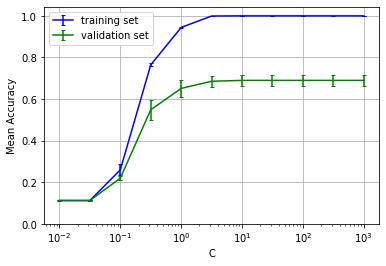

In [8]:
# (1)

# build model and cross validation model
skf = StratifiedKFold(n_splits=3, shuffle=False)
C = [10**i for i in (-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0)]
scores_train = []
scores_test = []


def stratified_kfold_validate(c=0, train=True):
    lst_accu_stratified = []
    model = SVC(kernel='rbf', C=c)
    
    # build Stratified K fold cross validation
    for train_index, test_index in skf.split(Xtrn_s, Ytrn): 
        X_train_fold, X_test_fold = Xtrn_s[train_index], Xtrn_s[test_index] 
        y_train_fold, y_test_fold = Ytrn[train_index], Ytrn[test_index] 
        model.fit(X_train_fold, y_train_fold)
        if train:
            lst_accu_stratified.append(model.score(X_train_fold, y_train_fold))
        else:
            lst_accu_stratified.append(model.score(X_test_fold, y_test_fold))
            
    return lst_accu_stratified


# cross validate SVC model for different values of C
for i in C:
    scores_train.append(stratified_kfold_validate(c=i, train=True))
    scores_test.append(stratified_kfold_validate(c=i, train=False))


# compute mean and std of SVC cross-validation accuracies for different values of C
score_summary = lambda lst: (np.mean(lst), np.std(lst))
scores_train_summary = np.array([score_summary(x) for x in scores_train])
scores_test_summary = np.array([score_summary(x) for x in scores_test])


# visualise scores for different values of C
ax1 = plt.subplot()
ax1.errorbar(C, scores_train_summary[:,0], 
             yerr=scores_train_summary[:,1], capsize=2, color='b', label='training set')
ax1.set_xscale('log')
ax1.set_ylim(bottom=0)
ax1.set_ylabel('Mean Accuracy')
ax1.set_xlabel('C')

ax2 = ax1
ax2.errorbar(C, scores_test_summary[:,0], 
             yerr=scores_test_summary[:,1], capsize=2, color='g', label='validation set')
ax2.set_xscale('log')
ax2.set_ylim(bottom=0)

plt.legend()
plt.grid()
plt.show()

(2) ***Your answer goes here***  

Mean accuracy converges to 100% for the training set with higher values of C, suggesting overfitting of the model. With the validation set, mean accuracy converges to around 69%.

We observe that mean classification accuracy generally improves with higher values of C, though the accuracy tapers off after C value of **10<sup>-0.5</sup>** and converges to a constant level in both the training and validation sets.

(3) ***Your answer goes here***  

The highest mean cross-validation accuracy is around **0.690** and the value of $C$ which yielded it is **10**.

In [9]:
# (4) 

# we select regularisation parameter to be 10 as discovered above
svc = SVC(kernel='rbf', C=10)
svc.fit(Xtrn_s, Ytrn)

# print correctly classified instances and accuracy
pred = svc.predict(Xtst_s)
correct_instances = 0
for i in range(len(pred)):
    if pred[i] == Ytst[i]:
        correct_instances += 1

print('SVC classification correctly classified instances on test set: {}'.format(correct_instances))
print('SVC classification accuracy on test set: {:.3f}'.format(svc.score(Xtst_s, Ytst)))

SVC classification correctly classified instances on test set: 221
SVC classification accuracy on test set: 0.737


\pagebreak

# ========== Question 1.6 --- [15 marks] 

We would like to visualise the decision regions for the logistic regression classifier we trained in Question 1.4 and the SVM in Question 1.5 (see the notes below for detailed conditions), where we use the models trained with the standardised data **Xtrn_s**.
Since it is not possible to visualise the original vector of many dimensions, we consider a two-dimensional plane, i.e. cross section, in the original space and visualise decisions regions for the points on that plane, ignoring points outside the plane. We here employ the plane spanned by the first two principal components, where we assume that the plane shares the same origin as the one of the original vector space. 

1. [Code] For each of the classifiers, plot the decisions regions for the rectangular area of 200-by-200 grid points whose left-upper corner is $(−5\sigma_1, 5\sigma_2)$ and right-bottom corner is $(5\sigma_1, −5\sigma_2)$, where $\sigma_1$ and $\sigma_2$ denote the standard deviations for the first principal component and second principal component, respectively. 
Use Matplotlib's **contourf**, where you specify "cmap='jet', levels=np.arange(-0.5,10)".
You should also use Matplotlib's **colorbar** to display a colour bar, where you specify "ticks=range(10)".


2. [Text] Explain and discuss your findings briefly.

Notes:
- For SVM, use $C=1$ irrespective of the optimal value you obtained in Question 1.5.
- You should have two separate figures, one for the logistic regression, and the other for the SVM.

***Hint***: The projected point $\mathbf{z} = (z_1,...,z_D)$ with PCA is given as $\mathbf{z} = xV^T$, where $V$ is a $D$-by-$D$ square matrix, whose $i$-th row corresponds to the $i$-th eigenvector. Note that both
$\mathbf{z}$ and $\mathbf{x}$ represent the same point with different coordinate systems, the original vector space and the one spanned with $D$ eigenvectors, and the two coordinate systems share the same origin. Any points on the 2D-plane spanned with the first two principal components can be expressed as $\mathbf{z} = (z_1, z_2, 0, . . . , 0)$. You can find the corresponding $\mathbf{x}$ in the original vector space by $\mathbf{x} = \mathbf{z}V$.


\pagebreak
## Your answers for Question 1.6

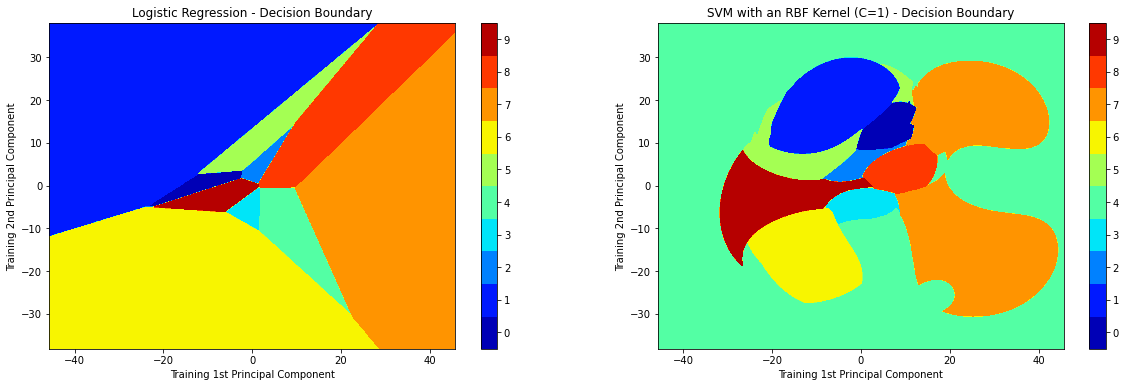

In [10]:
#(1)

# apply pca
pca = PCA(n_components=2)
Xtrn_s_pca = pca.fit_transform(Xtrn_s)


# prepare logistic regression
lr = LogisticRegression(max_iter=1000, random_state=0).fit(Xtrn_s_pca, Ytrn)

# plot decision boundary
x_min, x_max = np.std(Xtrn_s_pca[:, 0]) * -5, np.std(Xtrn_s_pca[:, 0]) * 5
y_min, y_max = np.std(Xtrn_s_pca[:, 1]) * -5, np.std(Xtrn_s_pca[:, 1]) * 5

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

# Z_lr = lr.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
# Z_lr = Z_lr.reshape(xx_train.shape)
Z_lr = lr.predict(np.array([xx_train.ravel(), yy_train.ravel()]).T).reshape(xx_train.shape)

plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_lr, cmap='jet', levels=np.arange(-0.5,10))
# plt.scatter(Xtrn_s_pca[:, 0], Xtrn_s_pca[:, 1], c = Ytrn, s = 30, edgecolor = 'k')
plt.colorbar(ticks=range(10))
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Logistic Regression - Decision Boundary')


# prepare support vector machine
svc = SVC(kernel='rbf', C=1).fit(Xtrn_s_pca, Ytrn)

# plot decision boundary
# Z_svc = svc.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
# Z_svc = Z_svc.reshape(xx_train.shape)
Z_svc = svc.predict(np.array([xx_train.ravel(), yy_train.ravel()]).T).reshape(xx_train.shape)

plt.subplot(1, 2, 2)
plt.contourf(xx_train, yy_train, Z_svc, cmap='jet', levels=np.arange(-0.5,10))
# plt.scatter(Xtrn_s_pca[:, 0], Xtrn_s_pca[:, 1], c = Ytrn, s = 30, edgecolor = 'k')
plt.colorbar(ticks=range(10))
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('SVM with an RBF Kernel (C=1) - Decision Boundary')
plt.show()

(2) ***Your answer goes here***  

From the decision boundaries above, we can see that logistic regression classifier belongs to the class of linear models. Kernel transformation applied to support vector machine, such as using radial basis function (RBF) in our case, enables a non-linear decision boundary in the original feature space.

\pagebreak

<!--# Question 2 Multivariate Gaussian distributions and binary classification-->
# Question 2 Generative models and parameter inference

#### 55 marks out of 110 for this coursework


In this question, we consider multivariate Gaussian distributions. We generate samples from a distribution, estimate the parameters of the model (i.e. distribution). We then carry out classification experiments on the data of two classes to find how a limited number of training samples has an impact on the classification. We also consider Gaussian mixture models (GMMs).


# ========== Question 2.1 --- [5 marks] ==========

Consider a two-dimensional (2D) Gaussian distribution with the mean vector $\mathbf{\mu}=(0,0)$.

[Code] For each of the covariance matrices, $\Sigma_1, \Sigma_2, \Sigma_3$, shown below, do the following:
- Plot 2D contours of the distribution and a 3D surface of the distribution side-by-side.
- Display the theoretical maximum value of the distribution at the top of the figure of 2D contours.

Note that:
- You should display a separate set of figures for each covariance matrix.
- For plotting 2D contours, use Matplotlib's **contour** with default parameters, in which the x-axis corresponds to $x_1$ and the y-axis to $x_2$, where $\mathbf{x} = (x_1,x_2)$. Use the fixed axis limits of $[-4,4,-4,4]$, and use "scaled" option for axis().
- For plotting a 3D surface, use Matplotlib's **plot_surface**, where use the 'coolwarm' colormap.
- The covariance matrices are as follows.
$$
 \Sigma_1 = \left(\begin{array}{cc} 1 & 0\\ 0 & 1 \end{array}\right),
 \quad
  \Sigma_2 = \left(\begin{array}{cc} 0.1 & 0\\ 0 & 0.1 \end{array}\right),
 \quad
  \Sigma_3 = \left(\begin{array}{cc} 3 & -1.5\\ -1.5 & 1 \end{array}\right)
$$



\pagebreak
## Your answer for Question 2.1

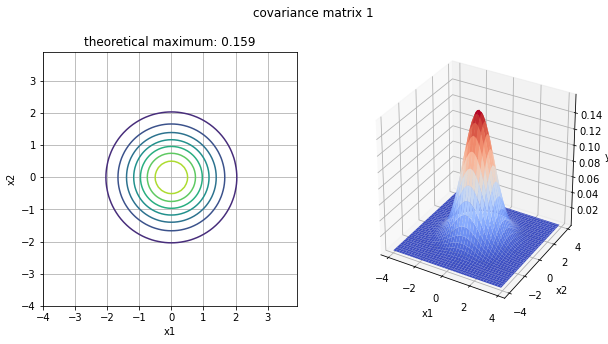

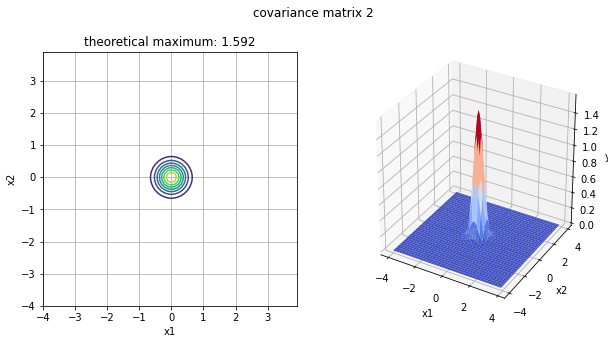

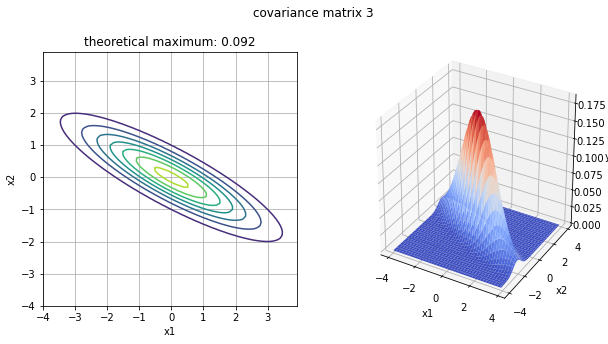

In [11]:
# [Code]

# set mean vector and covariance matrices
mean = [0,0]
covariance_matrix_1 = [[1, 0], [0, 1]]
covariance_matrix_2 = [[0.1, 0], [0, 0.1]]
covariance_matrix_3 = [[3, -1.5], [-1.5, 1]]


# define function to visualise plots
# function receives mean and covariance matrix as arguments
def visualise_contour_surface_plots(mean, covariance_matrix, title):
    x1, x2 = np.mgrid[-4:4:.1, -4:4:.1]
    rv = multivariate_normal(mean, covariance_matrix)
    data = np.dstack((x1, x2))
    y = rv.pdf(data)

    fig = plt.figure(figsize=(10, 5))
    fig.suptitle(title)

    # plot 2D contour
    ax = fig.add_subplot(1, 2, 1)
    ax.set_aspect('equal', adjustable='box', anchor='C') # equivalent to 'scaled' option for axis()
    ax.contour(x1, x2, y)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('theoretical maximum: {}'.format(
        round(1 / (2 * 
                   math.pi * 
                   math.sqrt(covariance_matrix[0][0]) * 
                   math.sqrt(covariance_matrix[1][1])), 
              3))) # formula from https://cs229.stanford.edu/section/gaussians.pdf
    ax.grid()

    # plot 3D surface
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_surface(x1, x2, y, cmap=cm.coolwarm, linewidth=0, antialiased=True)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y');
    ax.grid()

    plt.show()


# call above function to plot all covariance matrices
visualise_contour_surface_plots(mean, covariance_matrix_1, 'covariance matrix 1')
visualise_contour_surface_plots(mean, covariance_matrix_2, 'covariance matrix 2')
visualise_contour_surface_plots(mean, covariance_matrix_3, 'covariance matrix 3')

\pagebreak

# ========== Question 2.2 --- [10 marks] ==========

We here consider the parameter estimation of a 2D Gaussian distribution from samples, for which we generate $N$ samples from a model (i.e. a 2D Gaussian distribution), estimate the model parameters from the generated samples, and evaluate the accuracy of the parameter estimation.
As an evaluation measure, we use the function **kl_mvn()**, which is provided in 'iaml21cw2_helpers.py'.
The function calculates dissimilarity from a Gaussian distribution $P$ to another Gaussian distribution $Q$ based on 
the Kullback-Leibler (KL) divergence. 
Note that details of the KL divergence is beyond the scope of this course and you are not required to study it in this coursework.

We now consider a 2D Gaussian distribution with a mean vector $\mathbf{\mu}=(0,0)$ and a covariance matrix $\Sigma = \left(\begin{array}{cc}1 &0.5\\0.5&1\end{array}\right)$.

1. [Code]
  - Set the random seed by calling np.random.seed(1). This is important to make the experiment reproducible.
  - Do the following 6 times
     - Generate $N=10$ samples from the model using Numpy's **multivariate_normal** and estimate the model parameters (i.e. mean vector and covariance matrix) from the samples using the maximum-likelihood estimation.
     - Plot the samples.
     - On the same figure as the one for plotting samples, plot a 2D contour for each of the true distribution and estimated distribution. To avoid clutter, you plot a ***single contour*** whose level is equal to 0.022 for each distribution. See the note below regarding the line styles to use.
     - Obtain the KL divergence from the true distribution to the estimated one and display it above the figure.

  Note that
  
  - Use the same axis limits for all the six figures, and use equal scaling for the x and y axes to make circles circular.
  - The 6 figures you obtained should be shown in a 2-by-3 grid as shown below (no need to show lines between/around figures):\
  \------------------------\
  | Fig-1 | Fig-2 | Fig-3 |\
  | Fig-4 | Fig-5 | Fig-6 |\
  \------------------------
  - When plotting a 2D contour of a distribution, use a dashed line for the true distribution and a solid line for the estimated distribution.


2. [Code] Letting $N=20$ instead of 10, do the same as 1 above.


3. [Text] Based on the results you obtained in 1 and 2, explain your findings and give discussions.


\pagebreak
## Your answers for Question 2.2

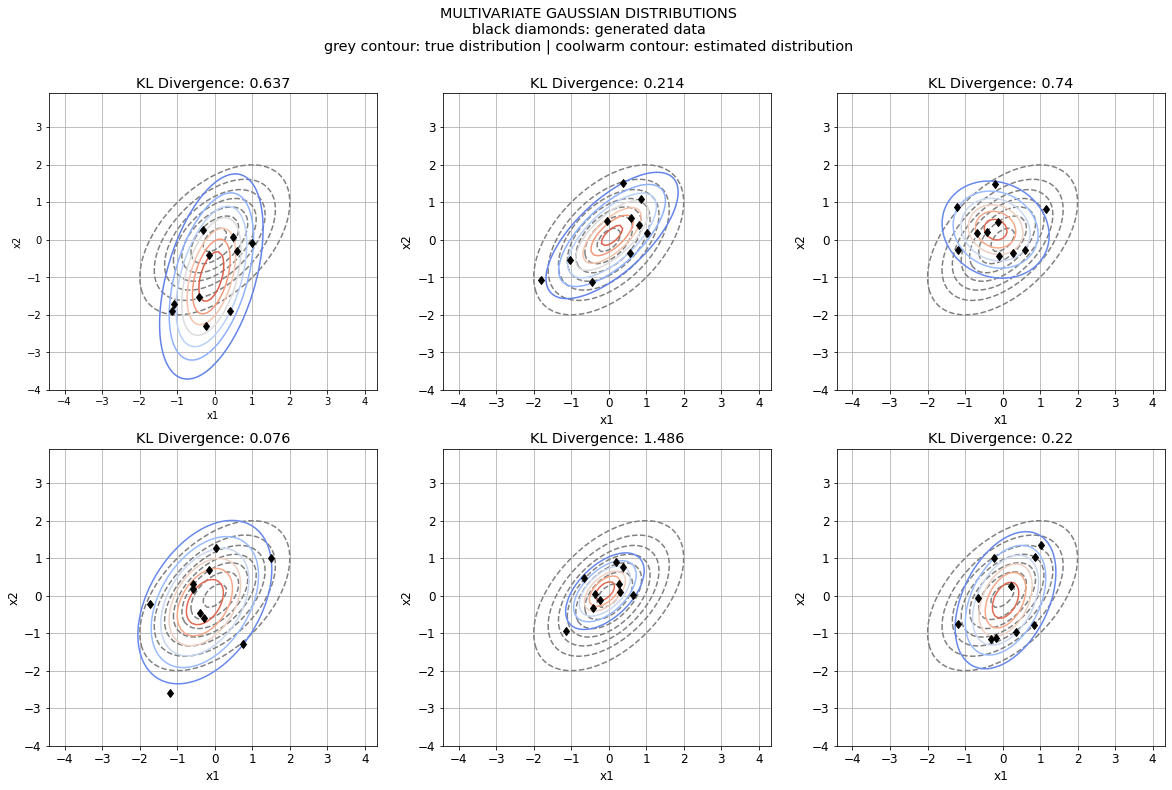

In [12]:
#(1)

# set random seed
np.random.seed(1)

# define function to visualise multivariate Gaussian data
# and contour plots
# function receives only 'N' argument for number of samples
def plot_multivariate_data_contours(N):
    # generate N samples
    mean = [0,0]
    cov = [[1, 0.5], [0.5, 1]]
    X = np.random.multivariate_normal(mean, cov, N)

    # estimate model parameters using maximum likelihood estimation
    mean_mle = np.mean(X, axis=0)
    X_centered = X - mean
    cov_mle = 1/N * np.dot(X_centered.T, X_centered)

    # plot samples
    plt.plot(X[:,0], X[:,1], 'd', c='k')

    # plot contours of true and estimated distributions
    x1, x2 = np.mgrid[-4:4:.1, -4:4:.1]
    rv1 = multivariate_normal(mean, cov)
    data1 = np.dstack((x1, x2))
    y1 = rv1.pdf(data1)
    plt.contour(x1, x2, y1, linestyles='dashed', level=0.022, colors='grey')

    rv2 = multivariate_normal(mean_mle, cov_mle)
    data2 = np.dstack((x1, x2))
    y2 = rv2.pdf(data2)
    plt.contour(x1, x2, y2, linestyles='solid', level=0.022, cmap='coolwarm')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.title('KL Divergence: {}'.format(round(kl_mvn(np.array(mean), np.array(cov), 
                                                      np.array(mean_mle), np.array(cov_mle)),
                                               3))) # displays Kullback–Leibler divergence
    plt.grid()
    

# set figure size
plt.figure(figsize = (20, 12))

# call above function 6 times to plot data in 2x3 grid with N=10
for i in range(1,7):
    plt.subplot(2,3,i)
    plot_multivariate_data_contours(10)

plt.suptitle('MULTIVARIATE GAUSSIAN DISTRIBUTIONS' + 
             '\nblack diamonds: generated data\n' + 
             'grey contour: true distribution | coolwarm contour: estimated distribution\n')

plt.show()

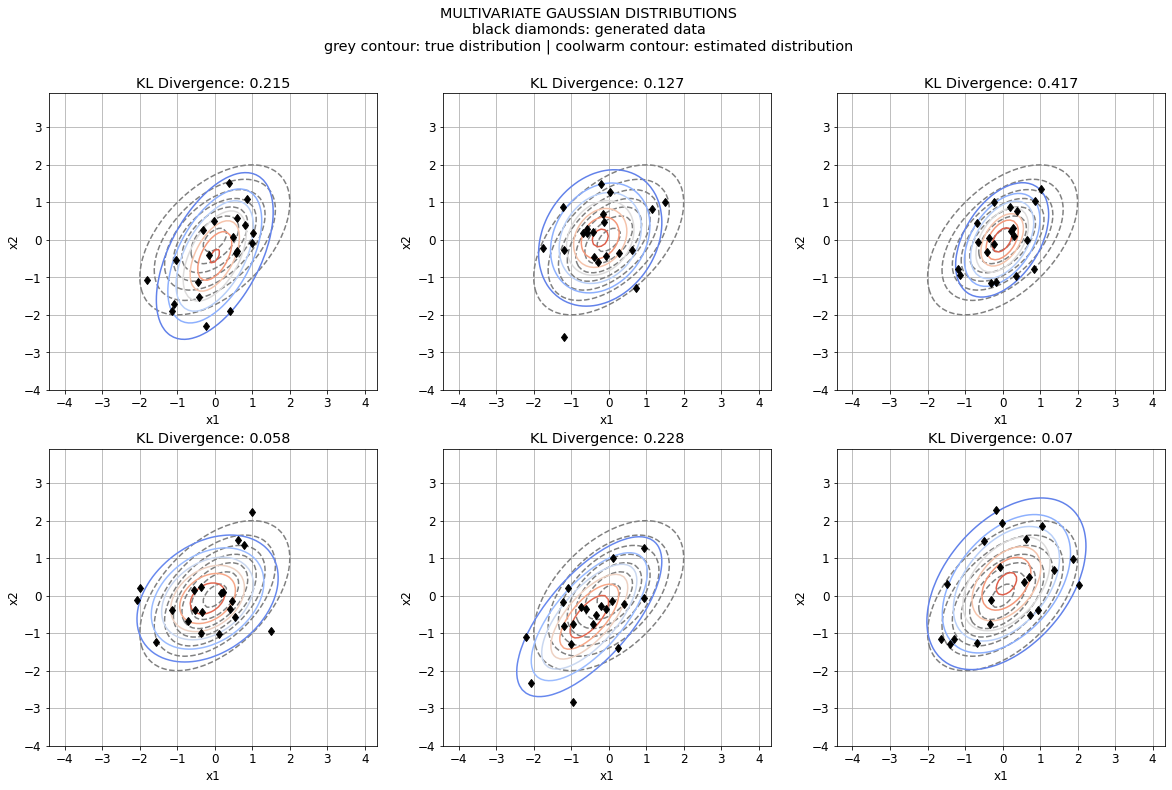

In [13]:
#(2) 

# set random seed
np.random.seed(1)

# set figure size
plt.figure(figsize = (20, 12))

# call plotting function defined above 6 times to plot data in 2x3 grid with N=20
for i in range(1,7):
    plt.subplot(2,3,i)
    plot_multivariate_data_contours(20)

plt.suptitle('MULTIVARIATE GAUSSIAN DISTRIBUTIONS' + 
             '\nblack diamonds: generated data\n' + 
             'grey contour: true distribution | coolwarm contour: estimated distribution\n')

plt.show()

(3) ***Your answer goes here***  

From both the contour plots and the KL Divergence data, we observe that the estimated distributions approach towards the true distribution with the higher number of samples. KL Divergence figures are lower with 20 samples compared to those of 10 samples. Moreover, the contour plots of the estimated distributions with 20 samples aligns better with the true distribution compared to the alignments of plots with 10 samples.

\pagebreak

# ========== Question 2.3 --- [8 marks] ==========

We now look into the relationship between the accuracy of parameter estimation and the number of samples for estimation.
As a true model, we use a 2D Gaussian distribution whose parameters are the same as the ones used in Question 2.2.

1. [Code] 
  - For $N=15, 30, 60, 100, 500, 2000$, do the following.
    - Set the random seed by calling np.random.seed(1).
    - Repeat the following 10 times:
      - Generate $N$ samples from the model.
      - Estimate the model parameters from the samples using the Maximum Likelihood estimation.
      - Obtain the KL divergence from the true distribution to the estimated distribution.
    - Calculate the mean and standard deviation of the KL divergence over the 10 repetitions above.
  - Plot the mean KL divergence as a function of $N$, where standard deviations are shown with error bars. Use a logarithmic scale for the x-axis.


2. [Text] Explain your findings and give discussions.

\pagebreak
## Your answers for Question 2.3

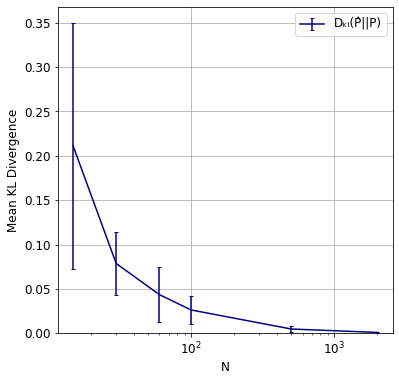

In [14]:
#(1)


# define function that takes mean, covariance matrix, 
# and N number of samples as arguments, 
# and returns mean and standard deviation of KL divergence
# over 10 repetitions of generated samples
def kl_divergence_mean_std(mean, cov, N):
    # set random seed
    np.random.seed(1)

    kl_divergence_list = []

    # generate N samples 10 times
    for i in range(10):
        X = np.random.multivariate_normal(mean, cov, N)

        # estimate model parameters using maximum likelihood estimation
        mean_mle = np.mean(X, axis=0)
        X_centered = X - mean
        cov_mle = 1/N * np.dot(X_centered.T, X_centered)

        # compute Kullback–Leibler (KL) divergence
        kl_divergence = kl_mvn(np.array(mean), np.array(cov), np.array(mean_mle), np.array(cov_mle))
        kl_divergence_list.append(kl_divergence)

    # compute mean and standard deviation of KL divergence over the repetitions
    kl_divergence_mean = np.mean(kl_divergence_list)
    kl_divergence_std = np.std(kl_divergence_list)

    return kl_divergence_mean, kl_divergence_std


# set mean vector and covariance matrix for the true distribution
mean = [0,0]
cov = [[1, 0.5], [0.5, 1]]

# set values of N
N = [15, 30, 60, 100, 500, 2000]
kl_divergences_computations = []

# call defined function to populate list of mean and standard deviation
for n in N:
    kl_divergences_computations.append(kl_divergence_mean_std(mean, cov, n))
kl_divergences_computations = np.array(kl_divergences_computations)

# plot the mean KL divergence over N with standard deviation as error bar
# use logarithmic scale for x-axis
plt.figure(figsize = (6, 6))
ax1 = plt.subplot()
ax1.errorbar(N, kl_divergences_computations[:,0], 
             yerr=kl_divergences_computations[:,1], capsize=2, color='navy', label='D\u2096\u2097(P\u0302||P)')
ax1.set_xscale('log')
ax1.set_ylim(bottom=0)
ax1.set_ylabel('Mean KL Divergence')
ax1.set_xlabel('N')

plt.legend()
plt.grid()
plt.show()

(2) ***Your answer goes here*** 

With higher number of N, both mean and standard deviation of KL Divergence decreases. This is because with a higher number of samples, the estimated distribution is getting closer and closer to the true distribution. The standard deviation is high with small number of samples because the estimated model parameters (i.e. mean, and covariance matrix) are prone to vary widely with generated datapoints at the tails of the distributions. With a large number of samples, the tails of the distributions do not have a significant effect on the model parameters of the Gaussian distributions.  

However, real world data can be very noisy and the convergence towards true Gaussian distribution parameters can take much more samples. Of course, if the data is not Gaussian (e.g. fat-tailed distributions), then the model parameters would not converge quickly or may not even converge.

\pagebreak

# ========== Question 2.4 --- [18 marks] ==========

Here we consider binary classification of 2D data with (i) logistic regression, (ii) linear SVM, (iii) non-linear SVM with a polynomial kernel, and (iv) multivariate Gaussian Bayes classifier. We are particularly interested in how the decision boundaries and classification performance (e.g. accuracy) change as the number of training samples increases.

At first, load the data set in the following manner:
```python
    Xtrn,Ytrn,Xtst,Ytst = pickle.loads(Path('dset_q2_4.pkl').read_bytes())
```
where **Xtrn**,**Ytrn**,**Xtst**,**Ytst** are the data and labels for training and those for testing, respectively. **Xtrn** is a numpy nd-array with a shape $(L,2)$, where $L$ denotes the number of samples and 2 denotes the dimensions of features for a sample. A label takes a binary value - 0 for Class 0 (denoted as $C_0$) and 1 for Class 1 ($C_1$).
The samples of each class were generated based on a 2D Gaussian distribution with a prior probability $P(C_k)$, where
$P(C_0) = \frac{2}{3}, \; P(C_1)=\frac{1}{3}$.
The 2D Gaussian distribution for $C_k$ is given as follows.
$$
    p(\mathbf{x}|C_k) = \frac{1}{2\pi|\Sigma_k|^{1/2}}\exp\left(-\frac{1}{2}(\mathbf{x}-\mathbf{\mu}_k)\Sigma_k^{-1}(\mathbf{x}-\mathbf{\mu}_k)^T\right),
$$
where
$$
   \mathbf{\mu}_0 = (3,5),\; \Sigma_0 = \left(\begin{array}{cc}1 & -0.5\\-0.5 & 2\end{array}\right), \quad
   \mathbf{\mu}_1 = (8,2),\; \Sigma_1 = \left(\begin{array}{cc}4 & 0.4\\0.4 & 2\end{array}\right). 
   $$

1. [Code]
  For $N = 15,30,50,100,200,500$, do the following:
  1. Train each of the four classifiers using the first $N$ samples from the training set {**Xtrn**,**Ytrn**}.
  2. For each class, plot a 2D contour for each of the true and estimated distributions on a figure in the same way as we did in Question 2.2. Use the equal scaling for the x and y axes so that circles are shown circular.
  3. Plot the $N$ samples on the same figure, using different colours for different classes.
  4. On the same figure, plot the theoretical decision boundary. (see the notes below)
  5. On the same figure, plot the decision boundary that is formed by each of the four classifiers. (see the notes below)
  6. Using the whole test data {**Xtst**,**Ytst**}, obtain the classification accuracy (Acc) and F1 score for each of the classifiers (i), (ii), and (iii), and display the information to the right of the figure. (NB: there is no need to do this for the classifier (iv).)
  
  *** Notes ***
  - Theoretical decision boundary: it is the decision boundary that is formed with the Bayes classification rule when the true model parameters are known. Since we assume multivariate Gaussian distributions in this question, the boundary is given using the the multivariate Gaussian Bayes classifier (shown below) with the true model parameters instead of the estimated ones. When plotting the theoretical decision boundary, use a dashed line in 'black'.
  - Multivariate Gaussian Bayes classifier: we employ the Bayes classification rule, $\arg\max_k P(C_k) p(\mathbf{x}|C_k)$, where $P(C_k)$ is the prior probability of $C_k$, $k=0,1$, and $p(\mathbf{x}|C_k)$ follows a multivariate Gaussian distribution. When plotting the decision boundary, use a solid line in 'black'.
 - Logistic regression: use the default parameters. When plotting a decision boundary, use a solid line in 'red'
  - Linear SVM: use a linear kernel. For plotting, use a solid line in 'green'.
  - Non-linear SVM with a polynomial kernel: use a polynomial kernel with a degree of 4. For plotting, use a solid line in 'magenta'.
  - When you plot decision boundaries with Matplotlib's **contour**, use at least 100 grid points for each of the x and y axis.


2. [Text] Explain your findings and give discussions, referring to underfitting and overfitting problems of classifiers.

\pagebreak
## Your answers for Question 2.4

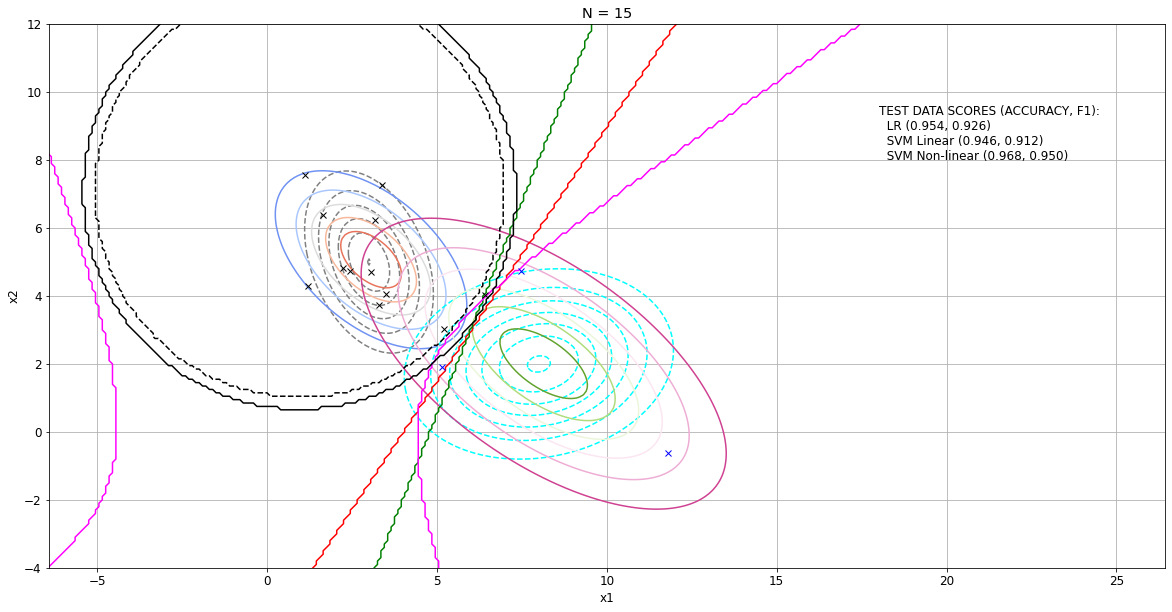

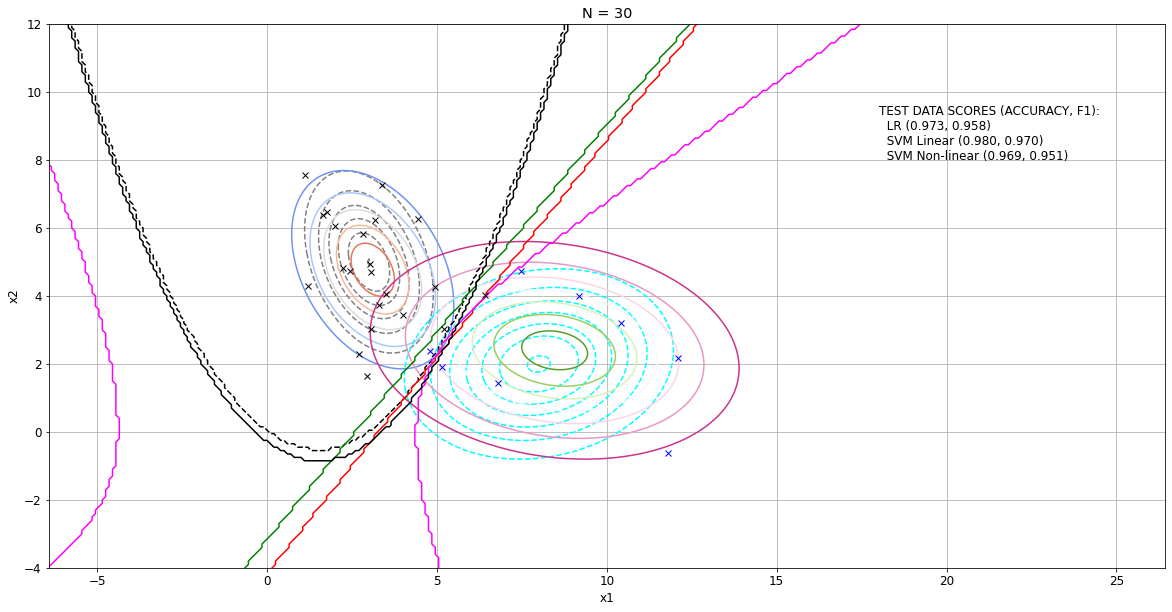

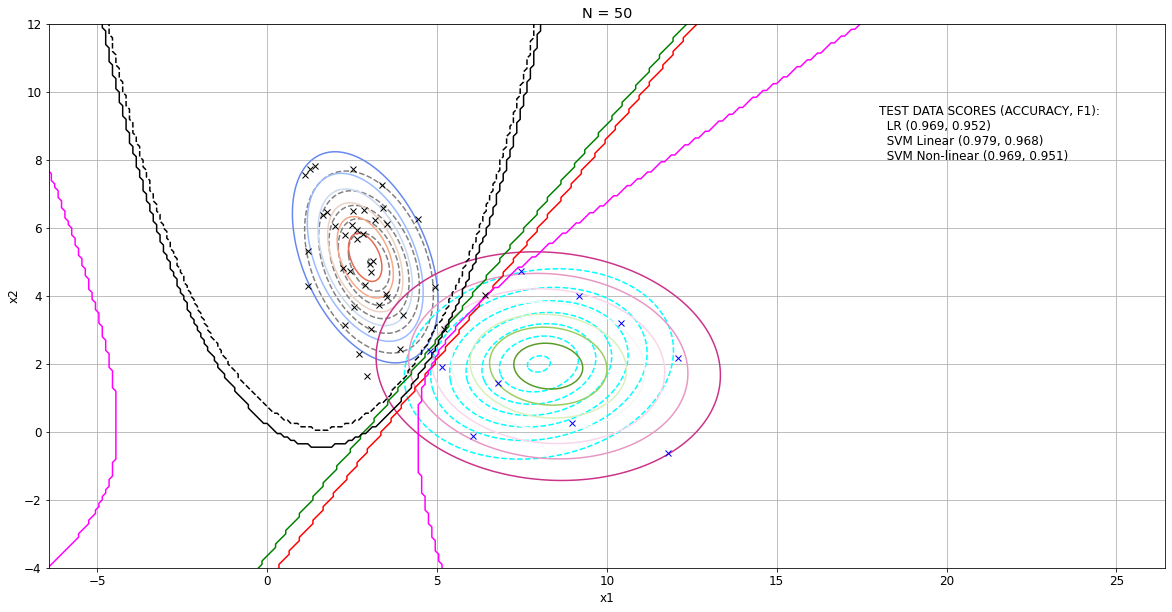

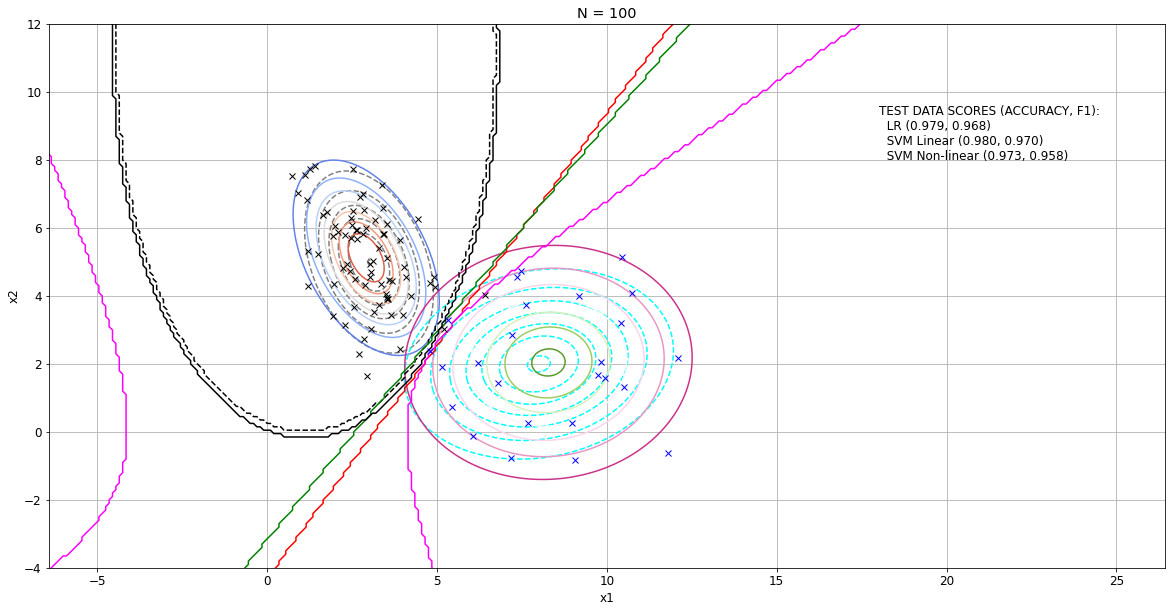

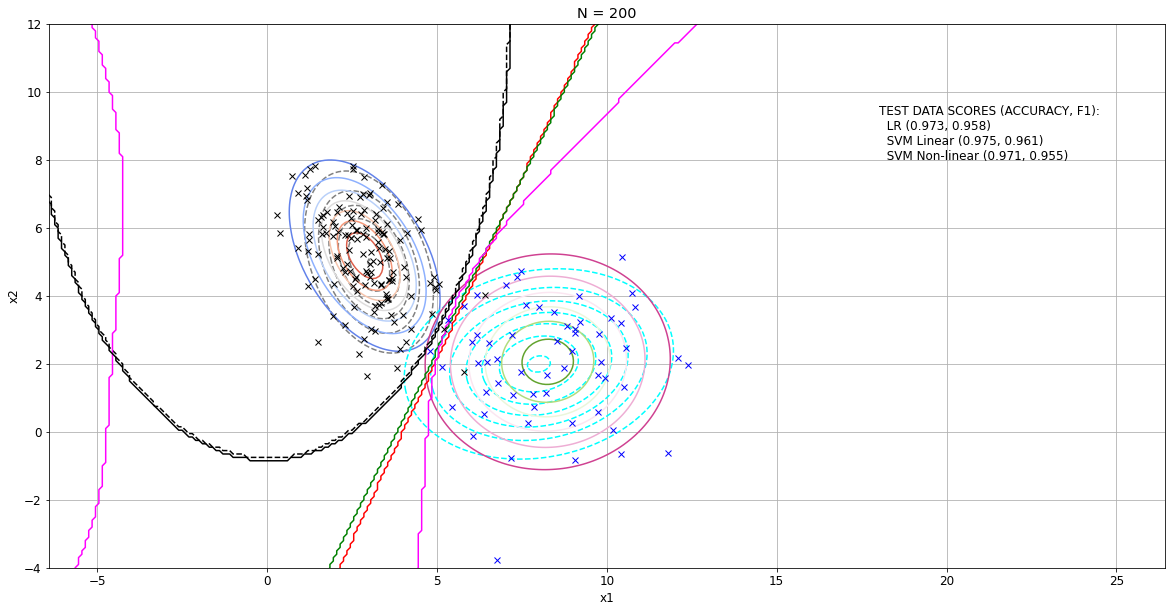

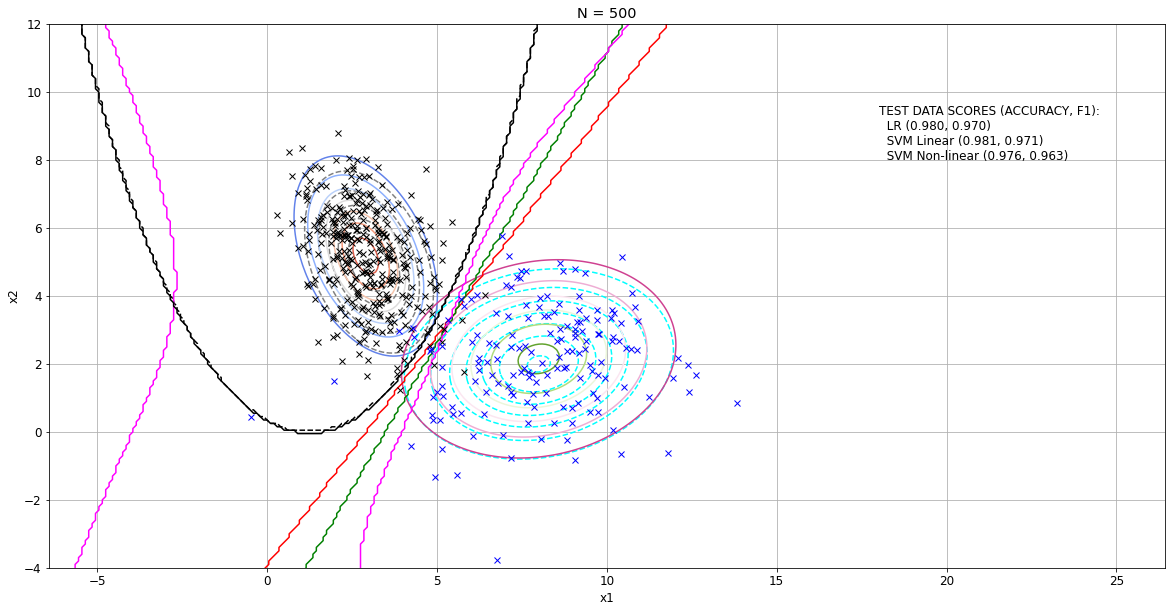

In [15]:
#(1)

# define function that takes N argument for number of samples
# plot samples, contours, and decision boundaries
def plot_samples_contours_decisions(N):
    # load dataset and prepare subset of samples
    Xtrn,Ytrn,Xtst,Ytst = pickle.loads(Path('dset_q2_4.pkl').read_bytes())
    Xtrn_sub = Xtrn[0:N, :]
    Ytrn_sub = Ytrn[0:N]

    # train each of the 4 classifiers
    # logistic regression
    lr = LogisticRegression().fit(Xtrn_sub, Ytrn_sub)
    # linear SVM
    svm_linear = SVC(kernel='linear').fit(Xtrn_sub, Ytrn_sub)
    # non-linear SVM
    svm_nonlinear = SVC(kernel='poly', degree=4).fit(Xtrn_sub, Ytrn_sub)
    # multivariate Gaussian Bayes
    gnb_theoretical = GaussianNB(priors=[2/3, 1/3]).fit(Xtrn_sub, Ytrn_sub)
    gnb_classifier = GaussianNB().fit(Xtrn_sub, Ytrn_sub)

    # divide dataset into subsets for different classes
    Xtrn_sub_c0 = Xtrn_sub[np.where(Ytrn_sub == 0)]
    Xtrn_sub_c1 = Xtrn_sub[np.where(Ytrn_sub == 1)]

    # set true parameters of the datasets
    mean_c0 = [3, 5]
    cov_c0 = [[1, -0.5], [-0.5, 2]]

    mean_c1 = [8, 2]
    cov_c1 = [[4, 0.4], [0.4, 2]]

    # estimate model parameters using maximum likelihood estimation
    mean_c0_mle = np.mean(Xtrn_sub_c0, axis=0)
    Xtrn_sub_c0_centered = Xtrn_sub_c0 - mean_c0
    cov_c0_mle = 1/Xtrn_sub_c0.shape[0] * np.dot(Xtrn_sub_c0_centered.T, Xtrn_sub_c0_centered)

    mean_c1_mle = np.mean(Xtrn_sub_c1, axis=0)
    Xtrn_sub_c1_centered = Xtrn_sub_c1 - mean_c1
    cov_c1_mle = 1/Xtrn_sub_c1.shape[0] * np.dot(Xtrn_sub_c1_centered.T, Xtrn_sub_c1_centered)

    # set figure size
    plt.figure(figsize = (20, 10))

    # plot samples
    plt.plot(Xtrn_sub_c0[:,0], Xtrn_sub_c0[:,1], 'x', c='k')
    plt.plot(Xtrn_sub_c1[:,0], Xtrn_sub_c1[:,1], 'x', c='b')

    # plot contours of true and estimated distributions
    # class 0
    x1, x2 = np.mgrid[-10:20:.1, -5:15:.1]
    rv1 = multivariate_normal(mean_c0, cov_c0)
    data1 = np.dstack((x1, x2))
    y1 = rv1.pdf(data1)
    plt.contour(x1, x2, y1, linestyles='dashed', level=0.022, colors='grey')

    rv2 = multivariate_normal(mean_c0_mle, cov_c0_mle)
    data2 = np.dstack((x1, x2))
    y2 = rv2.pdf(data2)
    plt.contour(x1, x2, y2, linestyles='solid', level=0.022, cmap='coolwarm')

    # class 1
    rv1 = multivariate_normal(mean_c1, cov_c1)
    data1 = np.dstack((x1, x2))
    y1 = rv1.pdf(data1)
    plt.contour(x1, x2, y1, linestyles='dashed', level=0.022, colors='cyan')

    rv2 = multivariate_normal(mean_c1_mle, cov_c1_mle)
    data2 = np.dstack((x1, x2))
    y2 = rv2.pdf(data2)
    plt.contour(x1, x2, y2, linestyles='solid', level=0.022, cmap='PiYG')

    # set labels, axis, and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')
    plt.title('N = {}'.format(N))

    # plot theoretical decision boundary
    y_theoretical = gnb_theoretical.predict(np.c_[x1.ravel(), x2.ravel()])
    y_theoretical = y_theoretical.reshape(x1.shape)
    plt.contour(x1, x2, y_theoretical, linestyles='dashed', colors='black', levels=np.arange(-0.5,10))

    # plot decision boundaries for each of the 4 classifiers
    # logistic regression
    y = lr.predict(np.c_[x1.ravel(), x2.ravel()])
    y = y.reshape(x1.shape)
    plt.contour(x1, x2, y, linestyles='solid', colors='red', levels=np.arange(-0.5,10))
    # linear SVM
    y = svm_linear.predict(np.c_[x1.ravel(), x2.ravel()])
    y = y.reshape(x1.shape)
    plt.contour(x1, x2, y, linestyles='solid', colors='green', levels=np.arange(-0.5,10))
    # non-linear SVM
    y = svm_nonlinear.predict(np.c_[x1.ravel(), x2.ravel()])
    y = y.reshape(x1.shape)
    plt.contour(x1, x2, y, linestyles='solid', colors='magenta', levels=np.arange(-0.5,10))
    # multivariate Gaussian Bayes
    y = gnb_classifier.predict(np.c_[x1.ravel(), x2.ravel()])
    y = y.reshape(x1.shape)
    plt.contour(x1, x2, y, linestyles='solid', colors='black', levels=np.arange(-0.5,10))

    # Using test data {Xtst,Ytst}, compute classification accuracy (Acc) and F1 score for 3 classifiers
    # logistic regression
    lr_accuracy = accuracy_score(Ytst, lr.predict(Xtst))
    lr_f1 = f1_score(Ytst, lr.predict(Xtst))

    # linear SVM
    svm_linear_accuracy = accuracy_score(Ytst, svm_linear.predict(Xtst))
    svm_linear_f1 = f1_score(Ytst, svm_linear.predict(Xtst))

    # non-linear SVM
    svm_nonlinear_accuracy = accuracy_score(Ytst, svm_nonlinear.predict(Xtst))
    svm_nonlinear_f1 = f1_score(Ytst, svm_nonlinear.predict(Xtst))

    # display scores at the right side of figure
    scores_test = 'TEST DATA SCORES (ACCURACY, F1):\n  LR ({:.3f}, {:.3f})\n  SVM Linear ({:.3f}, {:.3f})\n  SVM Non-linear ({:.3f}, {:.3f})'.format(lr_accuracy, lr_f1, svm_linear_accuracy, svm_linear_f1, svm_nonlinear_accuracy, svm_nonlinear_f1)
    plt.text(18, 8, scores_test)
    plt.rcParams['font.size'] = 12
    plt.xlim([0, 20])
    plt.ylim([-4, 12])
    plt.grid()
    plt.show()
    

# call defined function over all values of provided N
N_list = [15,30,50,100,200,500]
for n in N_list:
    plot_samples_contours_decisions(n)

(2) ***Your answer goes here***  

All of the classifiers seem to yield similar Accuracy and F1 scores. However, the plots reveal some interesting observations.  

* As expected, the contour plots of both classes approach towards their true distributions with larger sample size. The alignments of contour plots of the estimated distributions to those of their true distributions get better and better with larger samples.  

* Based on the decision boundaries, it seems that the classifiers are prone to observe their decision boundaries shift by the number of samples.  

* Over-fitting is quite common with nonparametric and nonlinear models that have more flexibility when learning a target function. We can see this behaviour here with non-linear SVM, where the decision boundaries change quite significantly with different values of N.  

* We can see that the linear classification models (i.e. logistic regression, linear SVM), due to their simplicity and inflexibility, can potentially under-fit the training data by missing the salient features in the data.  

* As the data is Gaussian, the decision boundary of the multivariate Gaussian Bayes classifier is the closest to that of the theoretical decision boundary.  

* The fluctuation seen with increasing N may be due to experimenting with only a small subset of the total data. Smoother curves may be achieved using crossover experiments.  


\pagebreak

# ========== Question 2.5 --- [14 marks] ==========

This is a mini project, in which you infer model parameters from a limited number of observations or samples generated from an unknown model. To simplify the problem, we assume that the model is a Gaussian Mixture Model (GMM), but we do not know its parameters,
i.e., the number of mixture components, $K$, the mean vector, $\mathbf{\mu}_k$, the covariance matrix, $\Sigma_k$, and the weight of the mixture component, $p_k$, for $k=1,\ldots,$K.

Given a set of observations, your task is to identify the GMM, i.e. find the most probable values of the parameters. It should be noted that the values you estimated would vary depending on the set of observations you use. In addition, the training algorithm used for the k-means clustering and GMMs does not guarantee global optima.
You should demonstrate that the parameters you obtained are optimal/suboptimal or reasonable on a certain ground.

As you recall, a GMM is defined as follows:
$$
 p(\mathbf{x}) = \sum_{k=1}^K p_k {\cal N}(\mathbf{x}|\mathbf{\mu}_k,\Sigma_k)
$$
where
$$
 {\cal N}(\mathbf{x}|\mathbf{\mu}_k,\Sigma_k) = \frac{1}{(2\pi)^{D/2}|\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x}-\mathbf{\mu}_k)\Sigma_k^{-1}(\mathbf{x}-\mathbf{\mu}_k)^T\right),
$$
$p_k$ is the weight of the component, $k$, and $D$ is the dimensions of features. $D=2$ in this task.

Load the data set in the following manner:
```python
        X = pickle.loads(Path('dset_q2_5.pkl').read_bytes())
```
We use this **X** as a set of observations to estimate the parameters.


1. [Code] Before we estimate the parameters of the GMM, we employ the k-means clustering for a basic analysis. Using Sklearn's  **KMeans** with the option "random_state=0", applying the k-means clustering to the data set **X** and plot the sum-squared error as a function of $k$, where you use $k=2,3,\ldots,30$.


2. [Text] Briefly comment on the result you obtained in 1 above. 


3. [Text] Describe how you would identify the GMM given the data set **X**. 


4. [Code] Using Sklearn's **GaussianMixture**, implement your idea/method that you described in 3 above, run experiments, and show the results. You should display a table that shows the parameters of the GMM you obtained, where each row corresponds to the mixture component number, $k$ and columns to $p_k$, $\mathbf{\mu}_k$, and $\Sigma_k$.


5. [Code] Plot a 2D contour of the estimated GMM, where you plot a contour whose level is equal to 0.005 only. 


6. [Text] Describe and discuss how confident you are about the parameters you obtained.


\pagebreak
## Your answer for Question 2.5

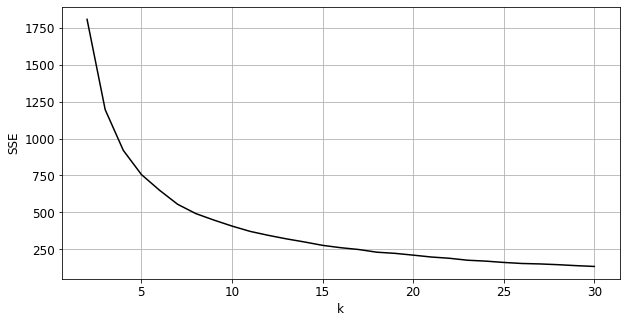

In [16]:
# (1)

# load dataset
X = pickle.loads(Path('dset_q2_5.pkl').read_bytes())

# prepare variables
k = [i for i in range(2,31)]
sse = []

# apply k-means over different values of k
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    sse.append(kmeans.inertia_)

# plot sse over k
plt.figure(figsize = (10, 5))
plt.plot(k, sse, c='k')
plt.xlabel('k')
plt.ylabel('SSE')

plt.grid()
plt.show()

(2) ***Your answer goes here***  

Sum of squared error decreases non-linearly over k. This is expected as the sum of squared distances of samples to their closest cluster center decreases with higher number of clusters. The cluster sizes get smaller with higher values of k.

(3) ***Your answer goes here***  

Expectation–maximization (EM) is a general procedure for maximizing a likelihood with latent (unobserved) variables [1]. 

There are two steps in EM:  
1. Estimating unobserved data from observed data and current parameters.  
2. Using this 'complete' data to find the maximum likelihood parameter estimates.  

One advantage of EM is that it is guaranteed to converge [1]. However, the disadvantage is that we can get stuck in local optima.  

In our approach:  
(1) We can visualise locations and shapes of GMM clusters by drawing ellipses based on GMM output across a range of components. From the plots, we can observe which component is most plausible.      
(2) We can fit models across a range of components and plot the mixtures (i.e. data histogram, PDF of whole model, and PDF of each component). From the plots, we can observe which component is most plausible.  
(3) We can visualise AIC and BIC across a range of components, and observe which component is most plausible.  
(4) From all the information above, we can select the best model.  


[1] https://www.cs.cmu.edu/~lwehbe/10701_S19/files/18-EM.pdf

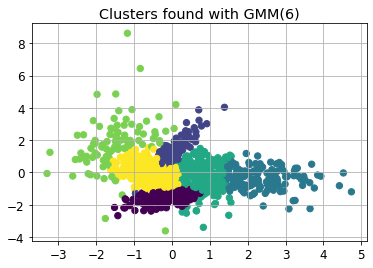


Matrix showing probability that any point belongs to the given cluster:

[[0.    0.334 0.017 0.075 0.029 0.545]
 [0.    0.    0.    0.    0.596 0.404]
 [0.    0.    0.    0.    0.974 0.026]
 [0.    0.    0.99  0.01  0.    0.   ]
 [0.565 0.    0.018 0.26  0.005 0.152]]



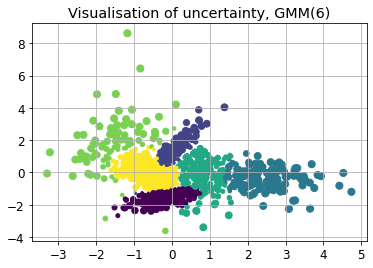

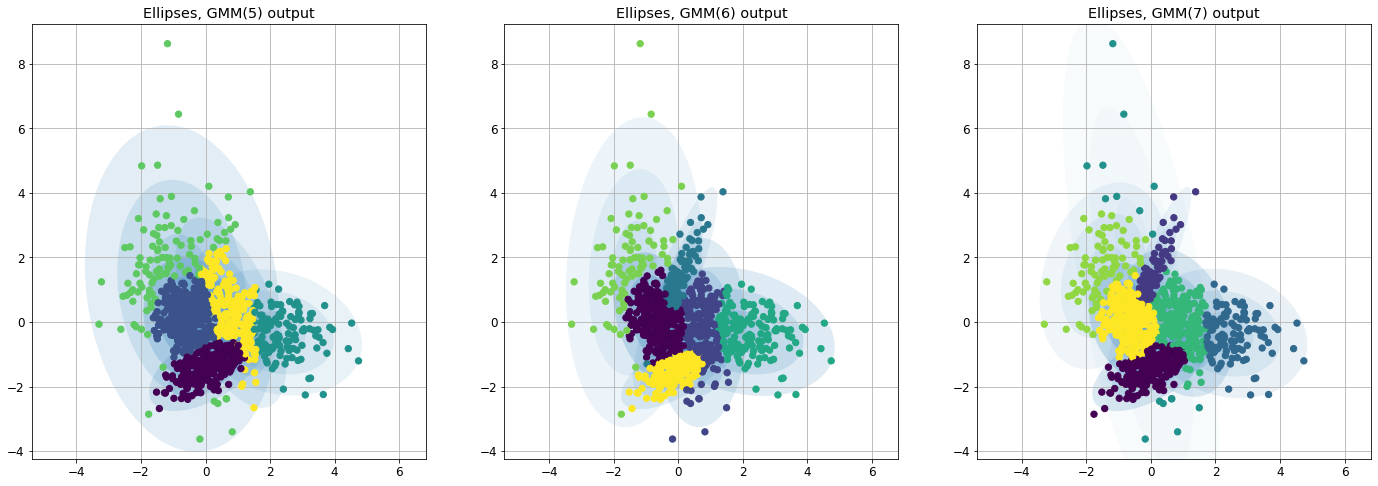

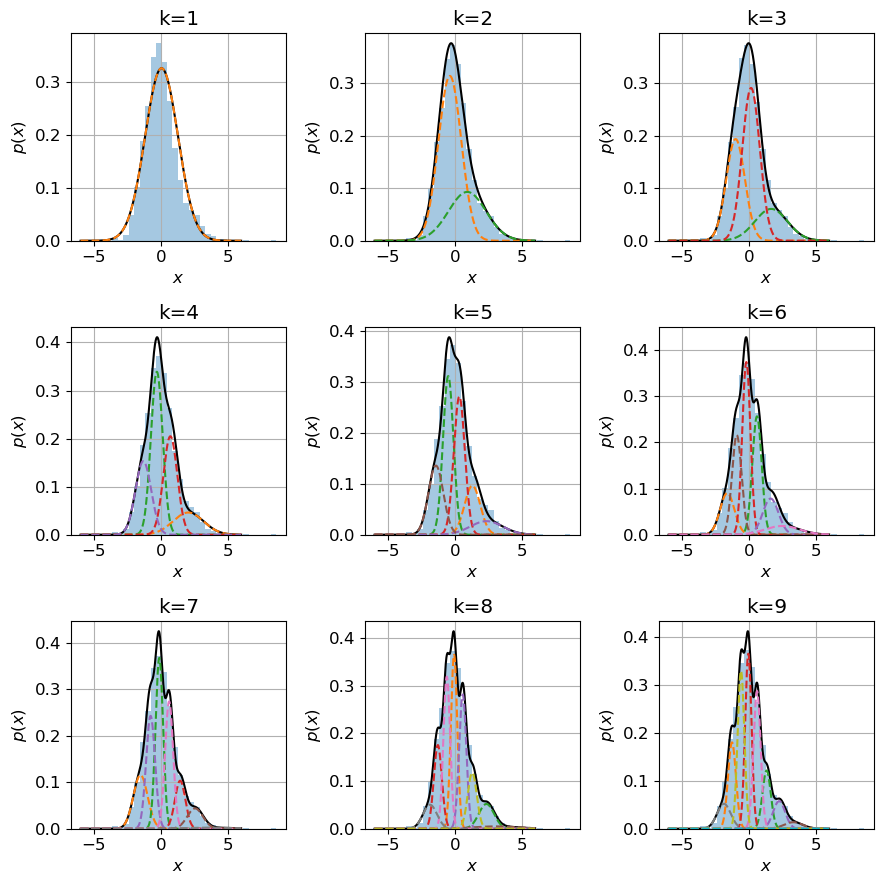

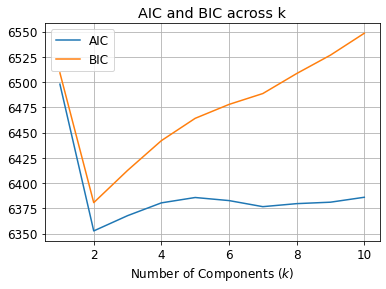

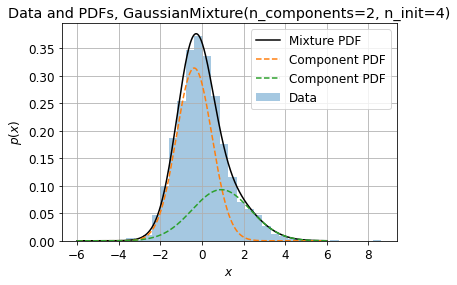

In [17]:
# (4)

# load dataset
X = pickle.loads(Path('dset_q2_5.pkl').read_bytes())


# GMM attempts to find a mixture of multi-dimensional Gaussian probability 
# distributions that best model any input dataset
gmm = GaussianMixture(n_components=6, n_init=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.title('Clusters found with GMM({})'.format(6))
plt.grid()
plt.show()


# GMM contains a probabilistic model under the hood
# it is possible to find probabilistic cluster assignments 
# this is done using predict_proba method, which returns a matrix of size [n_samples, n_clusters],
# which measures the probability that any point belongs to the given cluster
probs = gmm.predict_proba(X)
print('\nMatrix showing probability that any point belongs to the given cluster:\n')
print(probs[:5].round(3))
print()


# visualize this uncertainty by, for example, making the size of each point 
# proportional to the certainty of its prediction
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);
plt.title('Visualisation of uncertainty, GMM({})'.format(6))
plt.grid()
plt.show()
print()


# create a function that will visualize the locations and shapes of 
# the GMM clusters by drawing ellipses based on the GMM output
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


# we can take a look at what some different-component GMMs give us for our data
plt.figure(figsize = (24, 8))

for i in range(1,4):
    plt.subplot(1,3,i)
    gmm = GaussianMixture(n_components=i+4, n_init=4, random_state=0)
    plot_gmm(gmm, X)
    plt.grid()
    plt.title('Ellipses, GMM({}) output'.format(i+4))

plt.show()
print()


# fit models with 1-10 components
X = pickle.loads(Path('dset_q2_5.pkl').read_bytes())
X = X.reshape(-1, 1)

k_arr = np.arange(10) + 1

models = [
    GaussianMixture(n_components=k, n_init=4).fit(X)
    for k in k_arr
]


# define function to plot mixture model
def plot_mixture(gmm, X, show_legend=True, ax=None):
    if ax is None:
        ax = plt.gca()

    # compute PDF of whole mixture
    x = np.linspace(-6, 6, 1000)
    logprob = gmm.score_samples(x.reshape(-1, 1))
    pdf = np.exp(logprob)

    # compute PDF for each component
    responsibilities = gmm.predict_proba(x.reshape(-1, 1))
    pdf_individual = responsibilities * pdf[:, np.newaxis]
    
    # plot data histogram
    ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4, label='Data')

    # plot PDF of whole model
    ax.plot(x, pdf, '-k', label='Mixture PDF')

    # plot PDF of each component
    ax.plot(x, pdf_individual, '--', label='Component PDF')
    ax.grid()
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')
    if show_legend:
        ax.legend()


# show all models for n_components 1 to 9
_, axes = plt.subplots(3, 3, figsize=np.array([3,3])*3, dpi=100)
for gmm, ax in zip(models, axes.ravel()):
    plot_mixture(gmm, X, show_legend=False, ax=ax)
    ax.set_title(f'k={gmm.n_components}')
plt.tight_layout()
plt.show()
print()


# compute AIC and BIC metrics to determine best hyperparameter
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]
# Plot these metrics
plt.plot(k_arr, AIC, label='AIC')
plt.plot(k_arr, BIC, label='BIC')
plt.xlabel('Number of Components ($k$)')
plt.legend()
plt.grid()
plt.title('AIC and BIC across k')
plt.show()
print()


# show best model according to AIC criteria
gmm_best = models[np.argmin(AIC)]
plot_mixture(gmm_best, X)
plt.grid()
plt.title('Data and PDFs, {}'.format(models[np.argmin(AIC)]))
plt.grid()
plt.show()
print()

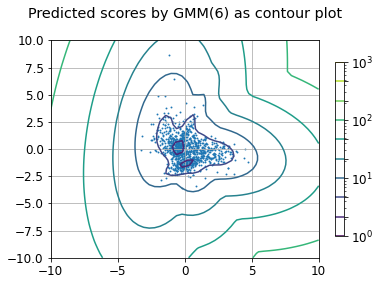

In [18]:
# (5)

# load data
X_train = pickle.loads(Path('dset_q2_5.pkl').read_bytes())

# fit a Gaussian Mixture Model with 6 components
clf = GaussianMixture(n_components=6, n_init=4, covariance_type="full")
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-10.0, 10.0)
y = np.linspace(-10.0, 10.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Predicted scores by GMM({}) as contour plot\n".format(6))
plt.grid()
plt.show()

(6) ***Your answer goes here***  

The disadvantage of EM is that we can get stuck in local optima. So, we anticipate that the algorithm described above may not converge to the global optimum.  

According to AIC, the model with 2 components is the best. However, we need to consider that the value we obtained is reasonable. For example, we can consider varying the number of training samples and employing cross validation to get better insight into the underlying uncertainty.  

From the plots above, we select the Gaussian Mixture Model with 6 components (**GMM(6)**) to be our most plausible model. Visually, we observe that this model fits the data well without overfitting.  

\pagebreak

In [19]:
# This cell's output will confirm all cells have been run if you select Kernel->Restart & Run All.
# Wait until you see the output printed
print("*****************************")
print("*                           *")
print("* All cells have been run!! *")
print("*                           *")
print("*****************************")

*****************************
*                           *
* All cells have been run!! *
*                           *
*****************************
